<a href="https://colab.research.google.com/github/thap/ml-sklearn-tensorflow/blob/master/03_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/My Drive/data/handon-ml/')
print(os.getcwd())
!ls

/content/drive/My Drive/data/handon-ml
datasets  images


In [0]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = '.'
CHAPTER_ID = 'classification'

def savefig(fig_id, tight_layout=True):
  path = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID, fig_id + '.png')
  print('Saving figure', fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format='png', dpi=300)


In [0]:
from sklearn.datasets import fetch_openml

In [0]:
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8)

In [0]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [0]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [0]:
X = mnist.data
y = mnist.target

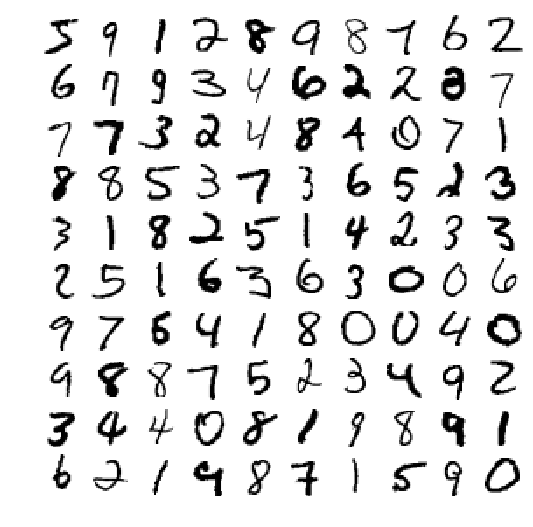

In [9]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

In [0]:
import numpy as np

np.random.seed(42)
shuffle_idx = np.random.permutation(70000)

In [11]:
X = X[shuffle_idx]
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
y = y[shuffle_idx]
y

array([8, 4, 8, ..., 1, 0, 0], dtype=int8)

In [13]:
X_train = X[:60000]
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
X_test = X[60000:]
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
y_train = y[:60000]
y_train

array([8, 4, 8, ..., 0, 8, 1], dtype=int8)

In [16]:
y_test = y[60000:]
y_test

array([0, 0, 6, ..., 1, 0, 0], dtype=int8)

In [17]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8),
 array([ 959, 1161, 1030,  984,  972,  912,  999, 1040,  991,  952]))

# Binary Classifier

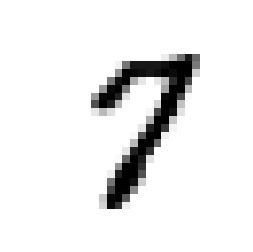

7


In [18]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
print(y[36000])

In [0]:
y_train_7 = (y_train == 7)
x_test_7 = (y_test == 7)

In [20]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_7)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [21]:
sgd_clf.predict([some_digit])

array([ True])

In [22]:
sgd_clf.predict([X[69999]])

array([False])

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_7, cv=3, scoring='accuracy')

array([0.97630118, 0.9758    , 0.97889894])

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_7):
  X_train_folds = X_train[train_index]
  y_train_folds = (y_train_7[train_index])
  X_test_fold = X_train[test_index]
  y_test_fold = (y_train_7[test_index])
  clone_clf = clone(sgd_clf)
  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

0.9763011849407529
0.9758
0.9788989449472474


In [0]:
from sklearn.base import BaseEstimator
class Never7Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

In [26]:
never_7_clf = Never7Classifier()
cross_val_score(never_7_clf, X_train, y_train_7, cv=3, scoring='accuracy')

array([0.8922 , 0.896  , 0.89915])

In [0]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_7, cv=3)

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_7, y_train_pred)

array([[52848,   899],
       [  481,  5772]])

In [0]:
y_train_pred_perfect = y_train_7

In [30]:
confusion_matrix(y_train_7, y_train_pred_perfect)

array([[53747,     0],
       [    0,  6253]])

In [31]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_7, y_train_pred)

0.8652375955628842

In [32]:
recall_score(y_train_7, y_train_pred)

0.9230769230769231

In [0]:
from sklearn.metrics import f1_score

In [34]:
f1_score(y_train_7, y_train_pred)

0.89322191272052

In [35]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([186198.16787303])

In [36]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [0]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_7, cv=3, 
                             method='decision_function')

In [38]:
y_scores.shape

(60000,)

In [39]:
y_scores.ndim

1

In [0]:
if y_scores.ndim == 2:
  y_scores = y_scores[:,1]

In [0]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_7, y_scores)

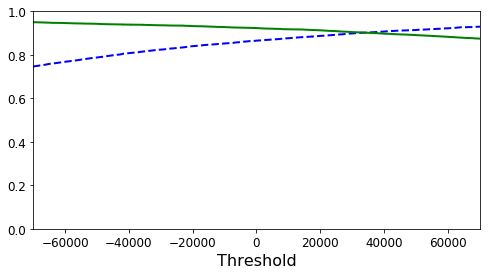

In [42]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], 'b--', label='Precision', linewidth=2)
  plt.plot(thresholds, recalls[:-1], 'g-', label='Recall', linewidth=2)
  plt.xlabel('Threshold', fontsize=16)
  plt.ylim([0,1])

plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-70000, 70000])
plt.show()

In [43]:
(y_train_pred == (y_scores > 0)).all()

True

In [0]:
y_train_pred_90 = (y_scores > 70000)

In [45]:
precision_score(y_train_7, y_train_pred_90)

0.9294697484704283

In [46]:
recall_score(y_train_7, y_train_pred_90)

0.8746201823124901

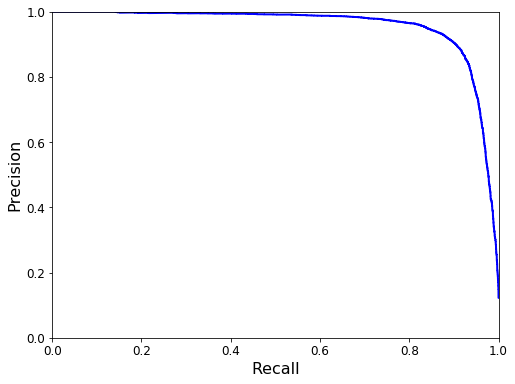

In [47]:
def plot_precision_vs_recall(precisions, recalls):
  plt.plot(recalls, precisions, 'b-', linewidth=2)
  plt.xlabel('Recall', fontsize=16)
  plt.ylabel('Precision', fontsize=16)
  plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8,6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [0]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_7, y_scores)

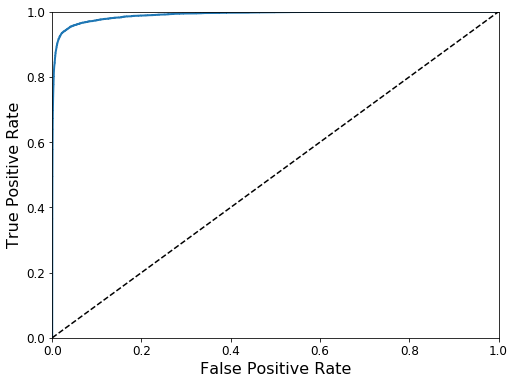

In [49]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1], [0,1], 'k--')
  plt.axis([0, 1, 0, 1])
  plt.xlabel('False Positive Rate', fontsize=16)
  plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8,6))
plot_roc_curve(fpr, tpr)
plt.show()

In [50]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_7, y_scores)

0.9902886661288921

In [0]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_7, cv=3, 
                                    method='predict_proba')

In [0]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_7, y_scores_forest)

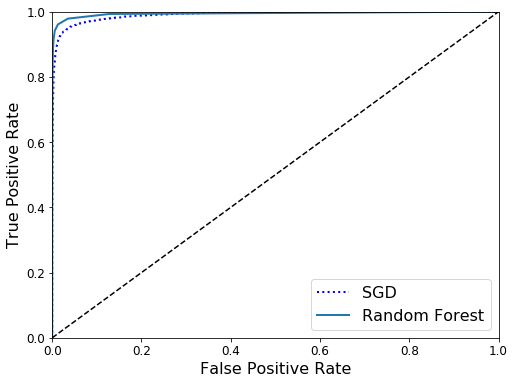

In [53]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, 'b:', linewidth=2, label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right', fontsize=16)
plt.show()

In [54]:
roc_auc_score(y_train_7, y_scores_forest)

0.993772854510699

In [55]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_7, cv=3)
precision_score(y_train_7, y_train_pred_forest)

0.9841043043400607

In [56]:
recall_score(y_train_7, y_train_pred_forest)

0.8811770350231889

# Multiclass Classification

In [57]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([7], dtype=int8)

In [58]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-265466.00455108, -500941.19657201, -495248.35747425,
        -361447.9139973 , -248214.85368015, -114445.2906494 ,
        -678665.30340387,  199714.23065327,  -64548.56476157,
        -148598.13801425]])

In [59]:
np.argmax(some_digit_scores)

7

In [60]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [61]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([7], dtype=int8)

In [62]:
len(ovo_clf.estimators_)

45

In [63]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([7], dtype=int8)

In [64]:
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [65]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87122575, 0.8612    , 0.87167433])

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.9110178 , 0.90865   , 0.90993199])

In [67]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5772,    2,   15,   11,   11,   38,   45,    8,   37,    5],
       [   1, 6469,   40,   28,    5,   43,    8,   10,  105,    7],
       [  53,   37, 5333,   93,   86,   23,   97,   57,  162,   19],
       [  42,   32,  139, 5403,    2,  221,   32,   57,  144,   85],
       [  20,   22,   36,    8, 5356,    9,   50,   35,   93,  223],
       [  79,   43,   34,  184,   75, 4567,  109,   32,  183,   95],
       [  42,   24,   53,    4,   45,   98, 5566,    6,   39,    0],
       [  25,   19,   76,   34,   49,   10,    5, 5777,   18,  240],
       [  59,  153,   66,  162,   21,  157,   61,   24, 4990,  141],
       [  50,   32,   21,   94,  155,   30,    3,  178,   84, 5359]])

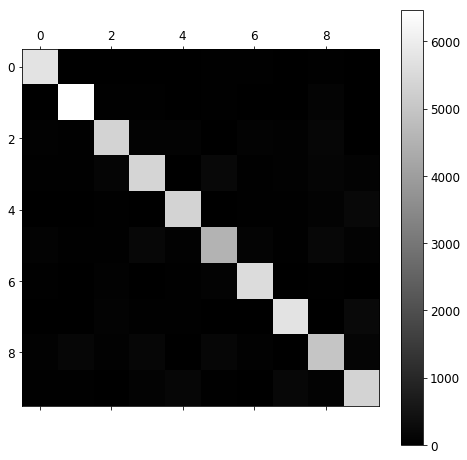

In [68]:
def plot_confusion_matrix(matrix):
  fig = plt.figure(figsize=(8,8))
  ax = fig.add_subplot(111)
  cax = ax.matshow(matrix, cmap=plt.cm.gray)
  fig.colorbar(cax)

plot_confusion_matrix(conf_mx)
plt.show()

In [0]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

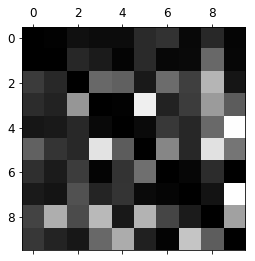

In [70]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

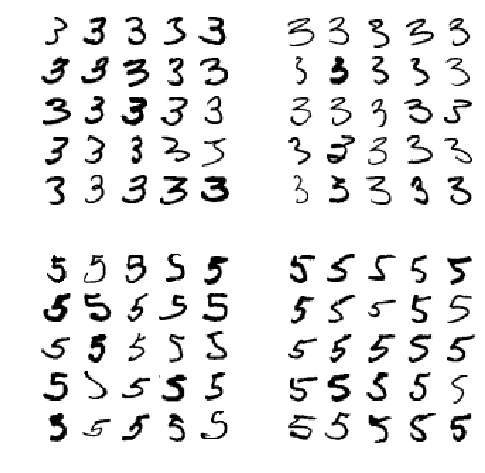

In [71]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

# Multilabel Classification

In [72]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [73]:
knn_clf.predict([some_digit])

array([[ True,  True]])

In [77]:
y_train_pred_knn = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_pred_knn, average='macro')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-77-9b2c8ab1c730>", line 1, in <module>
    y_train_pred_knn = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
  File "/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py", line 789, in cross_val_predict
    for train, test in cv.split(X, y, groups))
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 716, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/usr/local/lib/python3.6/dist-packages/joblib/_parallel_backends.py", line 

OSError: ignored

# Multioutput classification

In [0]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

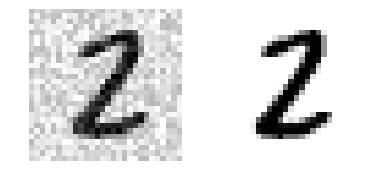

In [79]:
some_index = 5500
plt.subplot(121)
plot_digit(X_test_mod[some_index])
plt.subplot(122)
plot_digit(y_test_mod[some_index])
plt.show()

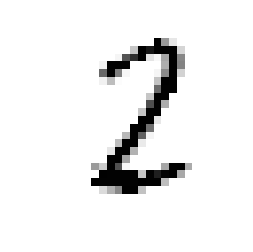

In [80]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

In [0]:
from sklearn.dummy import DummyClassifier

dmy_clf = DummyClassifier()
y_probas_dmy = cross_val_predict(dmy_clf, X_train, y_train_7, cv=3, method='predict_proba')
y_scores_dmy = y_probas_dmy[:,1]

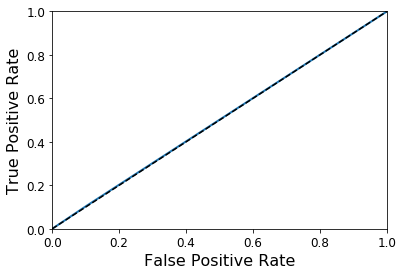

In [82]:
fpr_random, tpr_random, thresholds_random = roc_curve(y_train_7, y_scores_dmy)
plot_roc_curve(fpr_random, tpr_random)

# KNN Classifier

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='distance')

In [84]:
y_pred_knn = knn_clf.predict(X_test)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-84-948454225515>", line 1, in <module>
    y_pred_knn = knn_clf.predict(X_test)
  File "/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/classification.py", line 149, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/base.py", line 454, in kneighbors
    for s in gen_even_slices(X.shape[0], n_jobs)
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 934, in __call__
    self.retrieve()
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 833, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 638, in get
    self.wait(timeout)
  File "/usr/lib/python3.6/multiprocessing/pool.py", l

KeyboardInterrupt: ignored

In [86]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_knn)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-86-62d2cb5876c4>", line 3, in <module>
    accuracy_score(y_test, y_pred_knn)
NameError: name 'y_pred_knn' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.6/dist-packages/IPython/

NameError: ignored

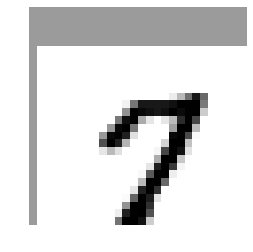

In [87]:
from scipy.ndimage.interpolation import shift

def shift_digit(digit_array, dx, dy, new=0):
  return shift(digit_array.reshape(28,28), [dx, dy], cval=new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1, new=100))

In [88]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1,0), (-1,0), (0,1), (0,-1)):
  shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
  X_train_expanded.append(shifted_images)
  y_train_expanded.append(X_train)

X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-88-6ec48b67761a>", line 9, in <module>
    y_train_expanded = np.concatenate(y_train_expanded)
ValueError: all the input arrays must have same number of dimensions

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ValueError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr

ValueError: ignored

In [89]:
knn_clf.fit(X_train_expanded, y_train_expanded)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-89-2ab2774b2d18>", line 1, in <module>
    knn_clf.fit(X_train_expanded, y_train_expanded)
  File "/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/base.py", line 892, in fit
    X, y = check_X_y(X, y, "csr", multi_output=True)
  File "/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py", line 722, in check_X_y
    dtype=None)
  File "/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py", line 496, in check_array
    array = np.asarray(array, dtype=dtype, order=order)
  File "/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py", line 538, in asarray
    return array(a, dtype, copy=False, order=order)
ValueError: could not broadcast input array from shape (60000,784) into shape (60000)

During handling of the above exception, an

ValueError: ignored

In [0]:
y_knn_pred_expanded = knn_clf.predict(X_test)

In [0]:
accuracy_score(y_test, y_knn_pred_expanded)